In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as generator
# from comet_ml import Experiment

models = keras.models
layers = keras.layers

# experiment = Experiment(api_key= "TLz1bKUwBaog2a5ZQxpSZrCoB",
#                         project_name="ex4",
#                         workspace="dlipr-kuo-tanveer-wieland",
#                         display_summary_level = 0)

In [ ]:
(x_data, y_data), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_data = keras.utils.to_categorical(y_data, 10) #shape:(50000, 10)
y_test = keras.utils.to_categorical(y_test, 10) #shape:(10000, 10)
n_split = int(50000 * 0.9)
x_train = x_data[:n_split,:,:,:]
x_valid = x_data[n_split:,:,:,:]
y_train = y_data[:n_split,:]
y_valid = y_data[n_split:,:]

170498071/170498071 [==============================] - 13s 0us/step


x_train (45000, 32, 32, 3)
y_train (45000, 10)
x_valid (5000, 32, 32, 3)
y_valid (5000, 10)
x_test (10000, 32, 32, 3)
y_test (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


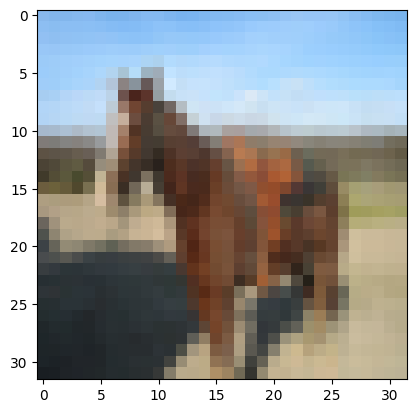

In [ ]:
print("x_train",np.shape(x_train))
print("y_train",np.shape(y_train))
print("x_valid",np.shape(x_valid))
print("y_valid",np.shape(y_valid))
print("x_test",np.shape(x_test))
print("y_test",np.shape(y_test))

No_data = 888
print(y_valid[No_data,:])
plt.imshow(x_valid[No_data,:,:,:])

In [ ]:
x_train = x_train.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255
x_test = x_test.astype("float32") / 255

train_gen = generator(
                      featurewise_center=False,
                      samplewise_center=False,
                      featurewise_std_normalization=False,
                      samplewise_std_normalization=False,
                      zca_whitening=False,
                      zca_epsilon=1e-06,
                      rotation_range=10,
                      width_shift_range=0.0,
                      height_shift_range=0.0,
                      brightness_range=None,
                      shear_range=0.0,
                      zoom_range=0.0,
                      channel_shift_range=0.0,
                      fill_mode='nearest',
                      cval=0.0,
                      horizontal_flip=True,
                      vertical_flip=False,
                      rescale=None,
                    )
train_gen.fit(x_train, augment=True, rounds=1, seed=None)

In [ ]:
model = models.Sequential([
            layers.InputLayer(input_shape=(32,32,3), name='input'),

            # CNN
            layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            # layers.Dense(64, activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.Dense(128, activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.Dense(256, activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Flatten(),

            # Dense
            layers.Dense(2048,activation='relu'),
            layers.Dense(1024,activation='relu'),
            layers.Dense(512,activation='relu'),
            layers.Dense(10,activation='softmax')
            ])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
batch_size = 128
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

fit = model.fit(
    train_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) / batch_size,
    validation_data=(x_valid, y_valid),
    epochs=50,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/50
351/351 [==============================] - 44s 101ms/step - loss: 1.8077 - accuracy: 0.3276 - val_loss: 1.4915 - val_accuracy: 0.4770
Epoch 2/50
351/351 [==============================] - 28s 79ms/step - loss: 1.3350 - accuracy: 0.5203 - val_loss: 1.1672 - val_accuracy: 0.5814
Epoch 3/50
351/351 [==============================] - 27s 77ms/step - loss: 1.1455 - accuracy: 0.5893 - val_loss: 1.2079 - val_accuracy: 0.5942
Epoch 4/50
351/351 [==============================] - 30s 84ms/step - loss: 1.0280 - accuracy: 0.6364 - val_loss: 0.9663 - val_accuracy: 0.6644
Epoch 5/50
351/351 [==============================] - 29s 83ms/step - loss: 0.9359 - accuracy: 0.6684 - val_loss: 0.8781 - val_accuracy: 0.7022
Epoch 6/50
351/351 [==============================] - 27s 77ms/step - loss: 0.8584 - accuracy: 0.6981 - val_loss: 0.8550 - val_accuracy: 0.6982
Epoch 7/50
351/351 [==============================] - 27s 78ms/step - loss: 0.8056 - accuracy: 0.7165 - val_loss: 0.8321 - val_accuracy

313/313 [==============================] - 1s 4ms/step
pred_loss 1.0474969148635864
pred_accuracy 0.7649999856948853


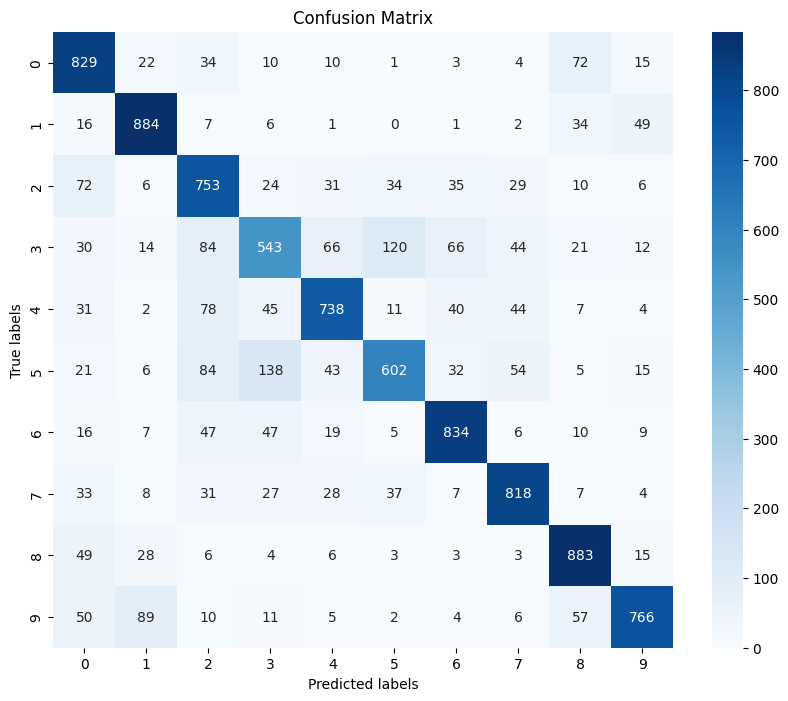

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

[pred_loss, pred_accuracy] = model.evaluate(x_test, y_test, verbose=0)
confusion_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print("pred_loss",pred_loss)
print("pred_accuracy",pred_accuracy)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import cv2
bro = cv2.imread("lil_brother.jpeg")
bro = np.float32(bro)
# x_train[0,:,:,:] = np.int8(x_train[0,:,:,:])
# print(bro.dtype)
# print(x_train[0,:,:,:].dtype)

# print(np.shape(bro))
# print(np.shape(x_train[0,:,:,:]))
x_test = np.stack((x_train[0,:,:,:],bro))
# print(np.shape(x_test))
y_pred = model.predict(x_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)

1/1 [==============================] - 0s 20ms/step
[[3.5197760e-03 2.8513613e-01 3.1253985e-06 9.6758641e-02 8.1352400e-09
  6.3643893e-05 8.9305496e-10 4.0073355e-06 6.1442006e-01 9.4581555e-05]
 [8.6274321e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


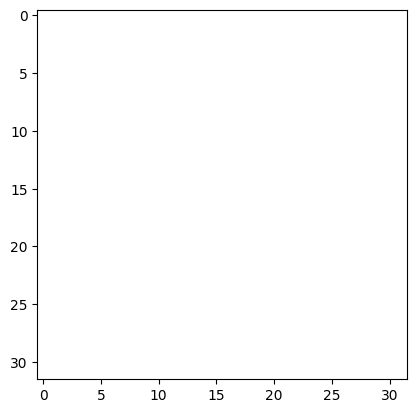

In [ ]:
# plt.imshow(bro)

# plt.show()
# print(bro[:,:,0])
# print(x_test[1,:,:,0])
# x_test[1,:,:,:] = np.int8(x_test[1,:,:,:])
plt.imshow(x_test[0,:,:,:])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization (Batch  (None, 13, 13, 128)       52        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 13, 13, 128)       16512     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
cv1 = np.asarray(model.layers[0].get_weights()[0]) # weight [3,3,3,64]
cv2 = np.array(model.layers[2].get_weights()[0])

print("cv1",cv1.shape)
print("cv2",cv2.shape)

cv1 (3, 3, 3, 64)
cv2 (3, 3, 64, 128)


<ipython-input-72-94aa02011225>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


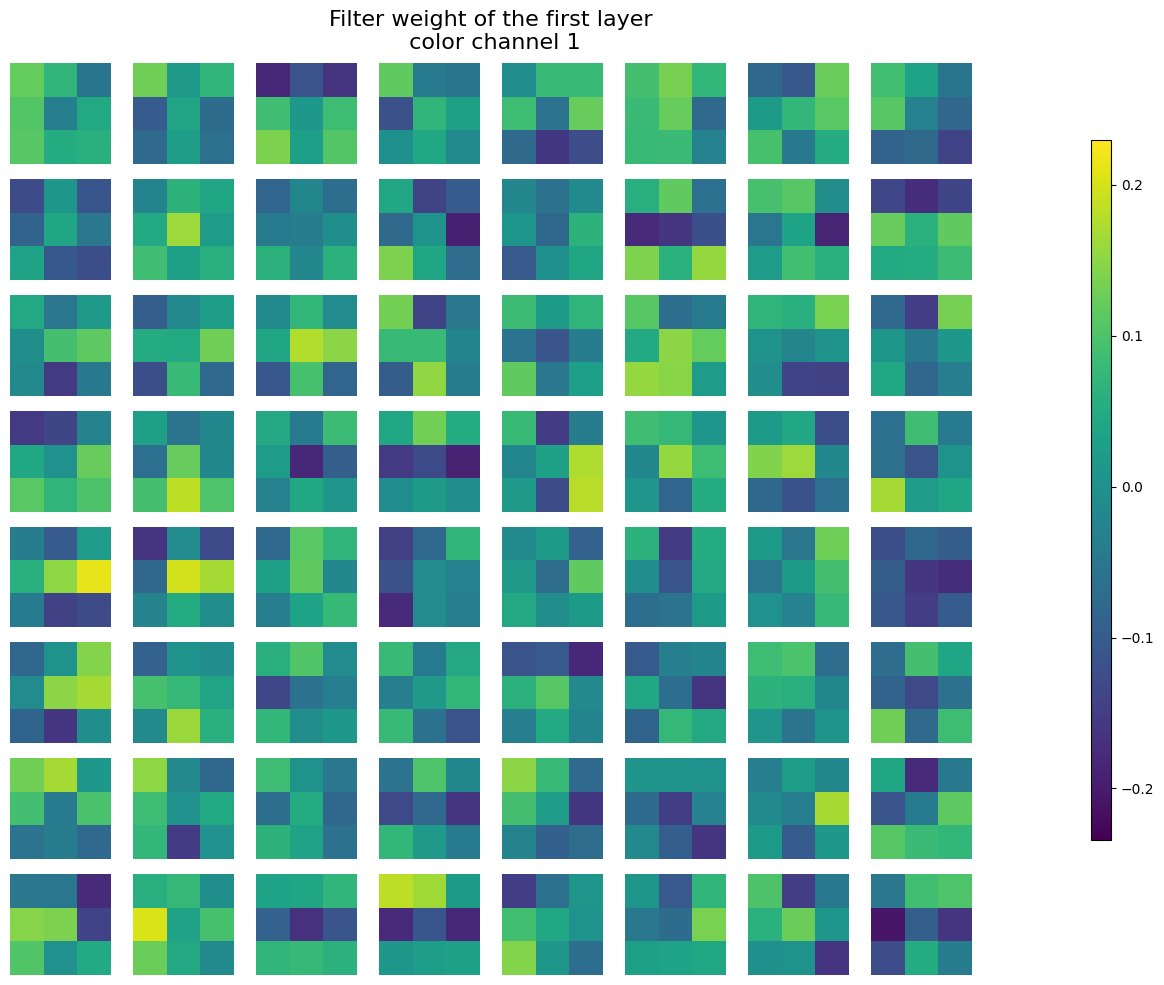

{'web': 'https://www.comet.com/api/image/download?imageId=4c631410723a4d8687bcb7845bbea160&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=4c631410723a4d8687bcb7845bbea160&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'imageId': '4c631410723a4d8687bcb7845bbea160'}

<Figure size 640x480 with 0 Axes>

In [ ]:
vmin = cv1.min()
vmax = cv1.max()

fig, axs = plt.subplots(8, 8, figsize=(10, 10))

for i in range(8):
    for j in range(8):

        axs[i][j].axis('off')
        axs[i][j].imshow(cv1[0, :, :, i * 8 + j], vmin=vmin, vmax=vmax)

cbar_ax = fig.add_axes([1.1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(axs[0][0].imshow(cv1[0, :, :, 0], vmin=vmin, vmax=vmax), cax=cbar_ax, orientation='vertical')

fig.suptitle("Filter weight of the first layer\n color channel 1", fontsize=16)

plt.tight_layout()
plt.show()
plt.savefig('weight_ch1.png')
experiment.log_figure(figure_name='weight_ch1.png', figure=fig)

1/1 [==============================] - 0s 60ms/step


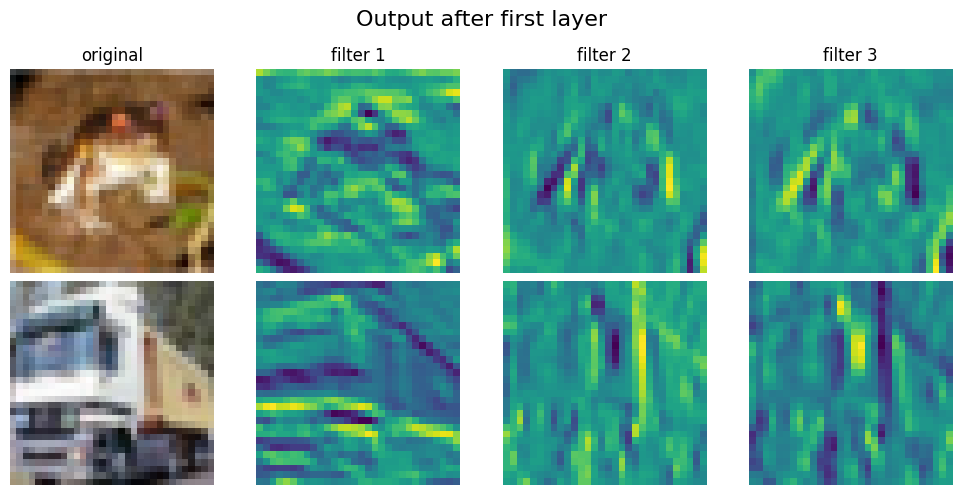

{'web': 'https://www.comet.com/api/image/download?imageId=2c450d8bc7c84cfbb2e66ced3add0124&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=2c450d8bc7c84cfbb2e66ced3add0124&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'imageId': '2c450d8bc7c84cfbb2e66ced3add0124'}

In [ ]:
from keras.models import Model

first_layer_output = Model(inputs=model.input, outputs=model.layers[0].output)
first_layer_output_result = first_layer_output.predict(x_train[0:2,:,:,:])

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs[0][0].set_title("original")
axs[0][0].imshow(x_train[0,:,:,:])
axs[0][1].set_title("filter 1")
axs[0][1].imshow(first_layer_output_result[0,:,:,0])
axs[0][2].set_title("filter 2")
axs[0][2].imshow(first_layer_output_result[0,:,:,1])
axs[0][3].set_title("filter 3")
axs[0][3].imshow(first_layer_output_result[0,:,:,2])

axs[1][0].imshow(x_train[1,:,:,:])
axs[1][1].imshow(first_layer_output_result[1,:,:,0])
axs[1][2].imshow(first_layer_output_result[1,:,:,1])
axs[1][3].imshow(first_layer_output_result[1,:,:,2])

for i in range(2):
  for j in range(4):
    axs[i][j].axis('off')

fig.suptitle("Output after first layer", fontsize=16)
plt.tight_layout()
plt.show()
# plt.savefig('weight_ch3.png')
experiment.log_figure(figure_name='first_layer_output.png', figure=fig)

1/1 [==============================] - 0s 59ms/step
(2, 13, 13, 128)


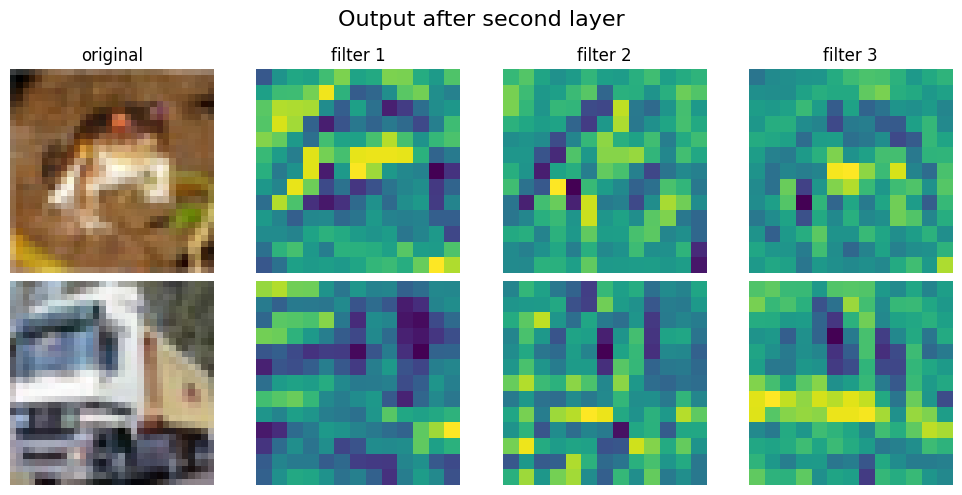

{'web': 'https://www.comet.com/api/image/download?imageId=a5a84c4c9ff04ae09d116871e88d4421&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a5a84c4c9ff04ae09d116871e88d4421&experimentKey=61d9652e20364984ab5d3cba0f432ed6',
 'imageId': 'a5a84c4c9ff04ae09d116871e88d4421'}

In [ ]:
second_layer_output = Model(inputs=first_layer_output.output, outputs=model.layers[2].output)
second_layer_output_result = second_layer_output.predict(first_layer_output_result)
print(np.shape(second_layer_output_result))

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs[0][0].set_title("original")
axs[0][0].imshow(x_train[0,:,:,:])
axs[0][1].set_title("filter 1")
axs[0][1].imshow(second_layer_output_result[0,:,:,0])
axs[0][2].set_title("filter 2")
axs[0][2].imshow(second_layer_output_result[0,:,:,1])
axs[0][3].set_title("filter 3")
axs[0][3].imshow(second_layer_output_result[0,:,:,2])

axs[1][0].imshow(x_train[1,:,:,:])
axs[1][1].imshow(second_layer_output_result[1,:,:,0])
axs[1][2].imshow(second_layer_output_result[1,:,:,1])
axs[1][3].imshow(second_layer_output_result[1,:,:,2])

for i in range(2):
  for j in range(4):
    axs[i][j].axis('off')

fig.suptitle("Output after second layer", fontsize=16)
plt.tight_layout()
plt.show()
# plt.savefig('weight_ch3.png')
experiment.log_figure(figure_name='second_layer_output.png', figure=fig)

In [ ]:
experiment.end()

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
